# Point Processing Methodologies

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

### Viewing the images

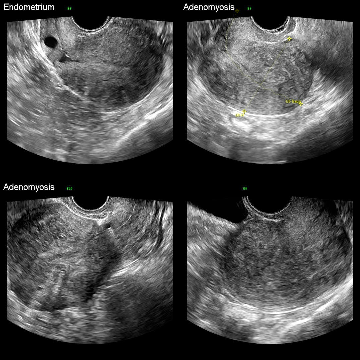

In [2]:
image = ["/content/Adenomyosis Crop/Adenomyosis 100033.jpg",
"/content/Adenomyosis Crop/Adenomyosis 110610.jpg",
"/content/Adenomyosis Crop/Adenomyosis 117010.jpg","/content/Adenomyosis Crop/Adenomyosis 118874.jpg"]
resized = []
i=0
img1 = cv.imread(image[0])
img2 = cv.imread(image[1])
img3 = cv.imread(image[2])
img4 = cv.imread(image[3])

rimg1 = cv.resize(img1,(180,180))
rimg2 = cv.resize(img2,(180,180))
rimg3 = cv.resize(img3,(180,180))
rimg4 = cv.resize(img4,(180,180))

image_row_1 = cv.hconcat([rimg1, rimg2])
image_row_2 = cv.hconcat([rimg3, rimg4])

combined_image = cv.vconcat([image_row_1, image_row_2])

cv2_imshow(combined_image)

### Negative Transformation

In [3]:
print(rimg1.dtype)

uint8


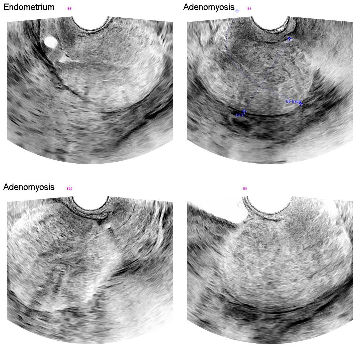

In [4]:
img_neg1 = 255 - rimg1
img_neg2 = 255 - rimg2
img_neg3 = 255 - rimg3
img_neg4 = 255 - rimg4

image_row_1 = cv.hconcat([img_neg1, img_neg2])
image_row_2 = cv.hconcat([img_neg3, img_neg4])

combined_image = cv.vconcat([image_row_1, image_row_2])

cv2_imshow(combined_image)

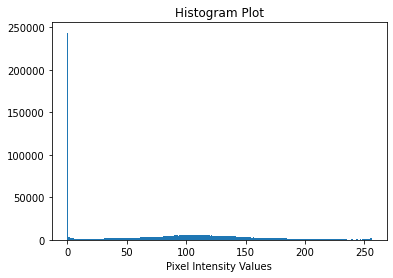

In [5]:
plt.hist(img1.ravel(),256,[0,256])
plt.title('Histogram Plot')
plt.xlabel('Pixel Intensity Values')
#plt.ylim(0,2000)
plt.show()

We know that black is too much because of the image settings - boundary pixel etc.

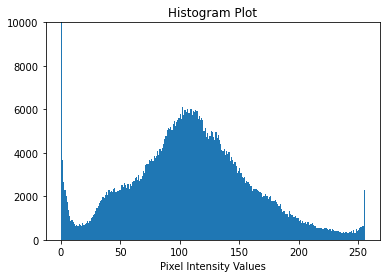

In [6]:
plt.hist(img1.ravel(),256,[0,256])
plt.title('Histogram Plot')
plt.xlabel('Pixel Intensity Values')
plt.ylim(0,10000)
plt.show()

Histogram plot : observed - bell curve

### Filters:
1. Linear Filters - Mean, Gaussian(Second Order filter), Bilateral
2. Non Linear Filters - Median, Max, Min
3. Dierectional Filters -<br> 
    3.1 First Order - Roberts, Prewitts, Krish, Sobel<br> 
    3.2 Second Order - Laplacian<br> 

Kernel Size = (3,3) - standard kernel size

#### Linear Filters

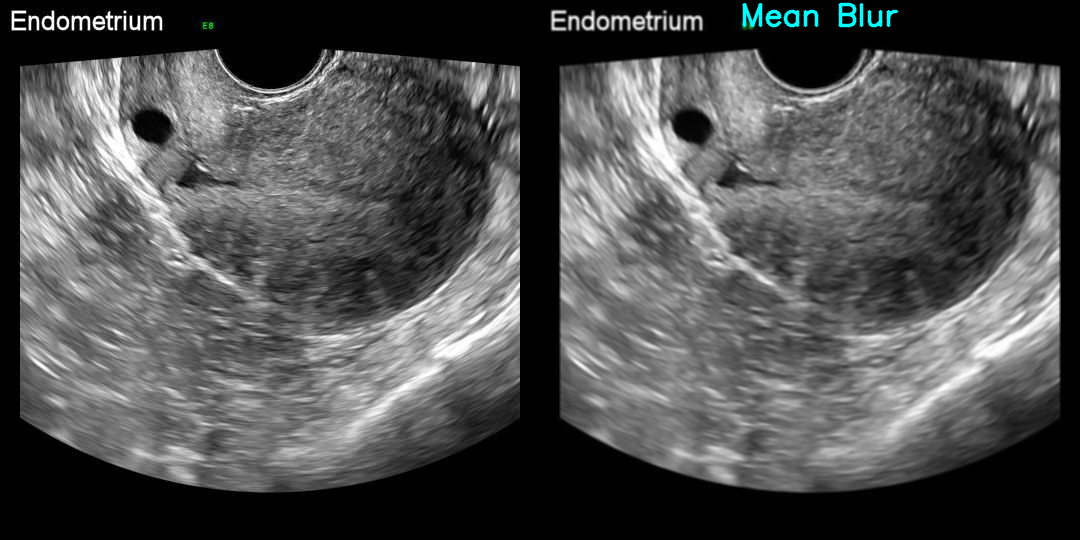

In [7]:
meanBlur_img1 = cv.blur(img1,(3,3))#kernel size taken as 3,3 as standard kernel size

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_MBlur_image = cv.putText(meanBlur_img1, 'Mean Blur', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame = cv.hconcat((img1, meanBlur_img1))

cv2_imshow(final_frame)

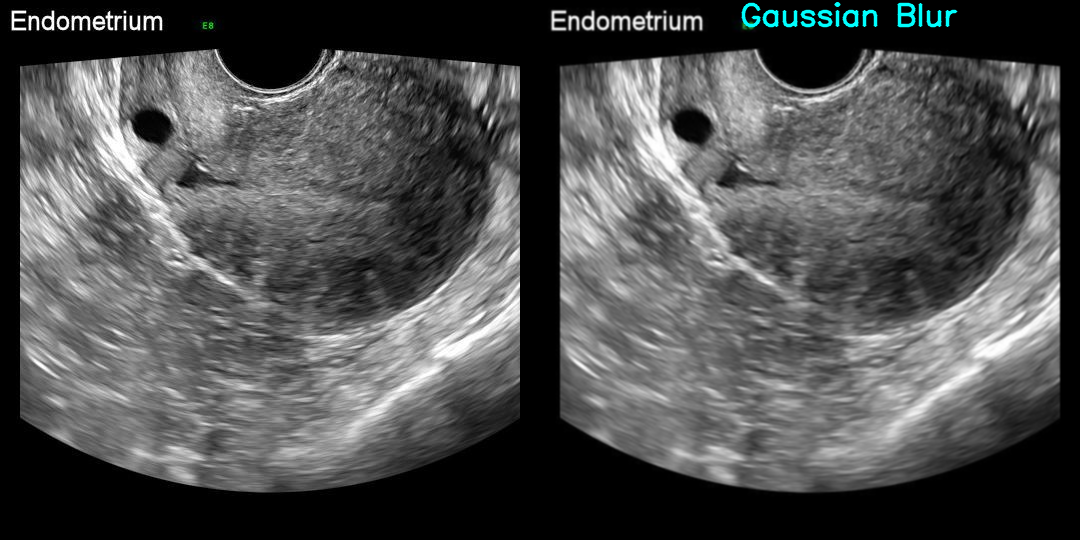

In [9]:
gaussianBlur_img1 = cv.GaussianBlur(img1,(3,3),0)#0 is standard deviation in x and y dierection

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_GBlur_image = cv.putText(gaussianBlur_img1, 'Gaussian Blur', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame2 = cv.hconcat((img1, gaussianBlur_img1))

cv2_imshow(final_frame2)

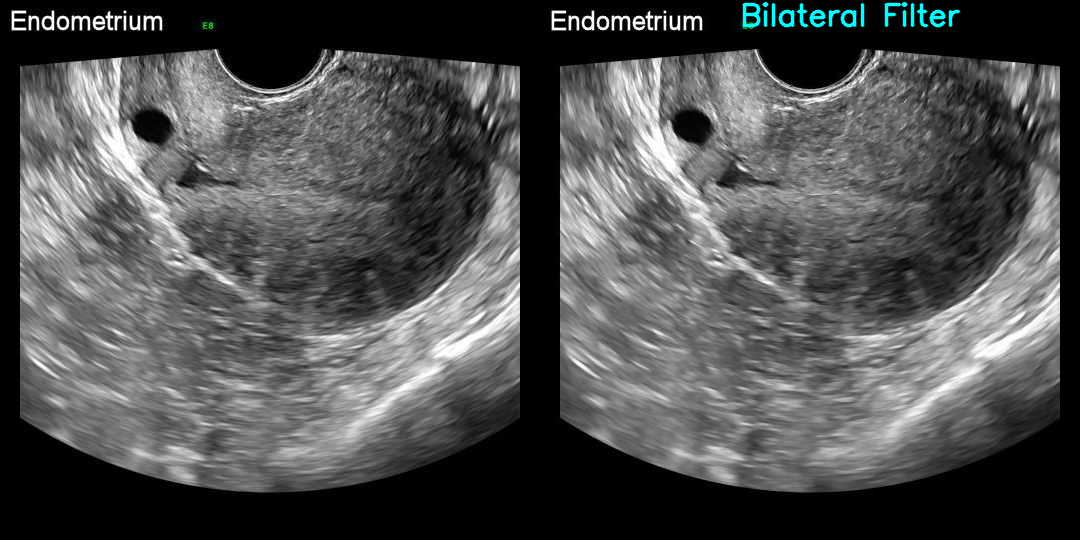

In [12]:
bilateralBlur_img1 = cv.bilateralFilter(img1,3,40,40)#3-kernel size,20 is sigmaSpace depicting number of pixel 
                                                     #in neighbourhood to merge with similar intensities

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
bilateralBlur_image = cv.putText(bilateralBlur_img1, 'Bilateral Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame3 = cv.hconcat((img1, bilateralBlur_img1))

cv2_imshow(final_frame3)


#### Non Linear Filters

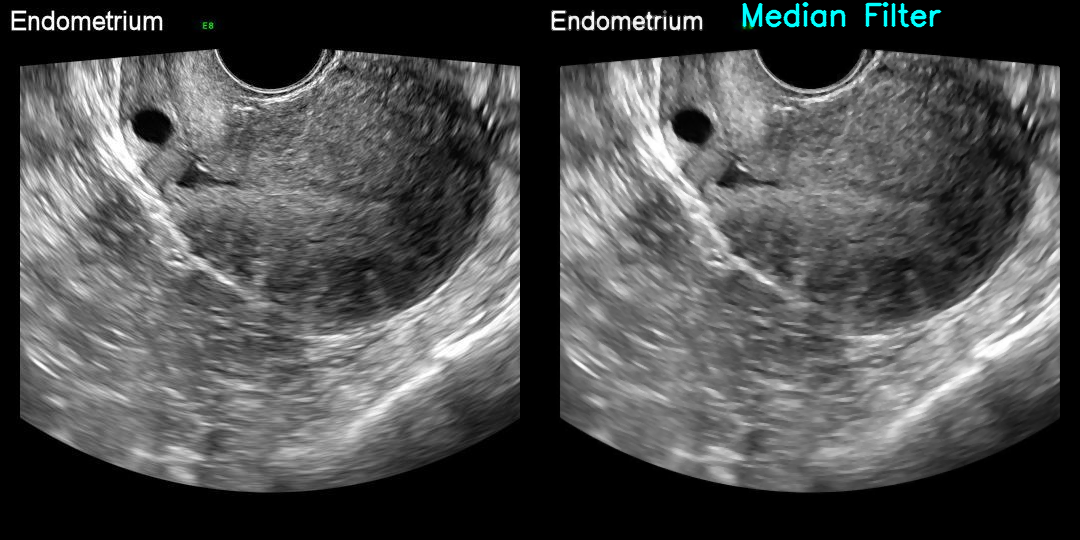

In [13]:
medianFilter_img1 = cv.medianBlur(img1,3)#3-kernel size

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_GBlur_image = cv.putText(medianFilter_img1, 'Median Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame3 = cv.hconcat((img1, medianFilter_img1))

cv2_imshow(final_frame3)

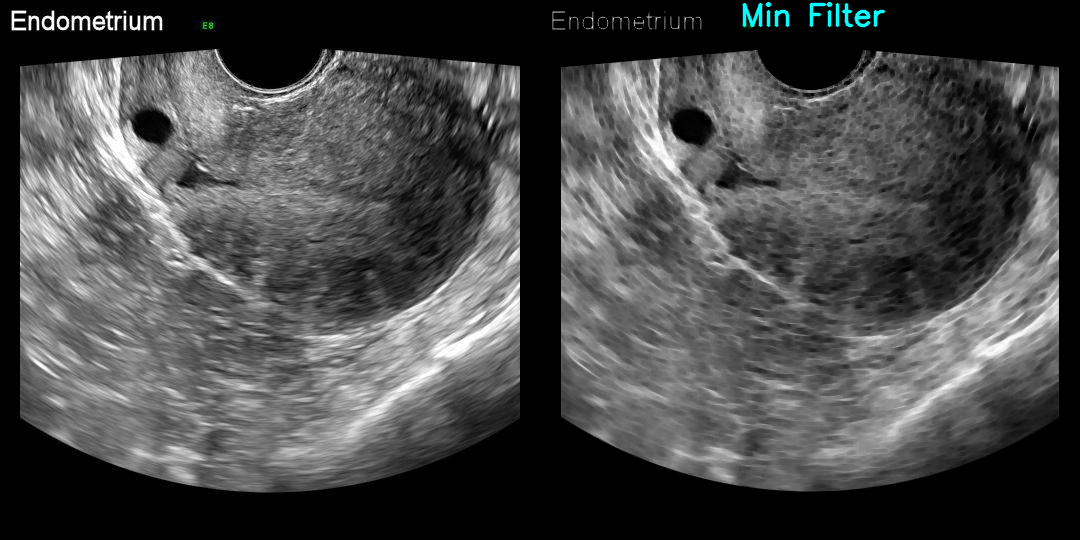

In [15]:
size = (3, 3)
shape = cv.MORPH_RECT
kernel = cv.getStructuringElement(shape, size)

min_filtered_img1 = img1

minFilImg = cv.erode(min_filtered_img1, kernel)

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2

minFiltered_image = cv.putText(minFilImg, 'Min Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame4 = cv.hconcat((img1, minFiltered_image))

cv2_imshow(final_frame4)

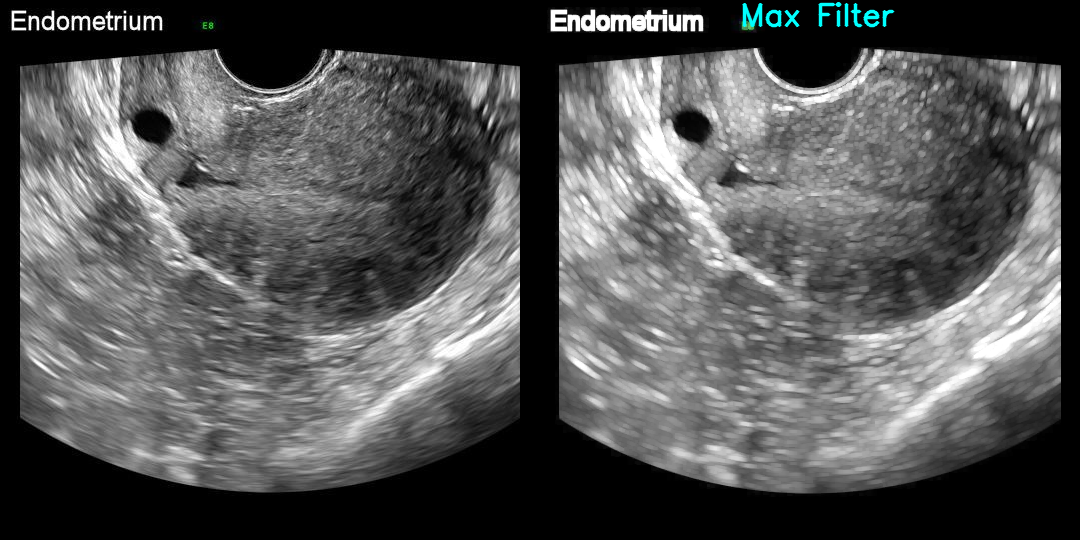

In [17]:
size = (3, 3)
shape = cv.MORPH_RECT
kernel = cv.getStructuringElement(shape, size)

max_filtered_img1 = img1

maxFilImg = cv.dilate(max_filtered_img1, kernel)

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2

maxFiltered_image = cv.putText(maxFilImg, 'Max Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame5 = cv.hconcat((img1, maxFiltered_image))

cv2_imshow(final_frame5)

#### Dierectional Filters

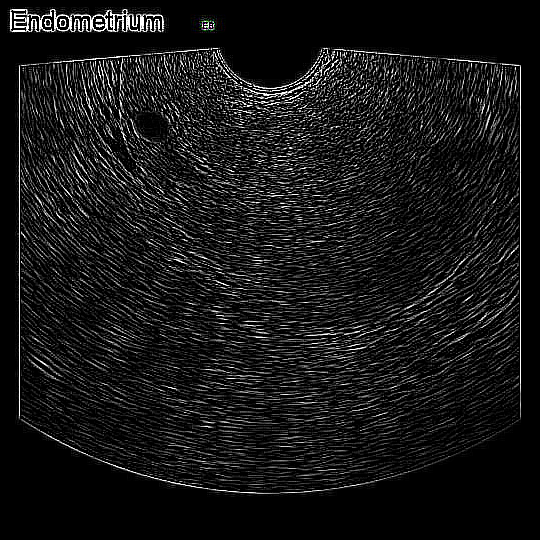

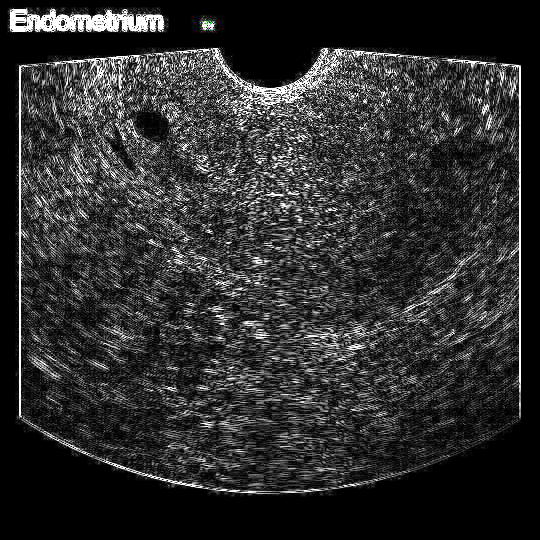

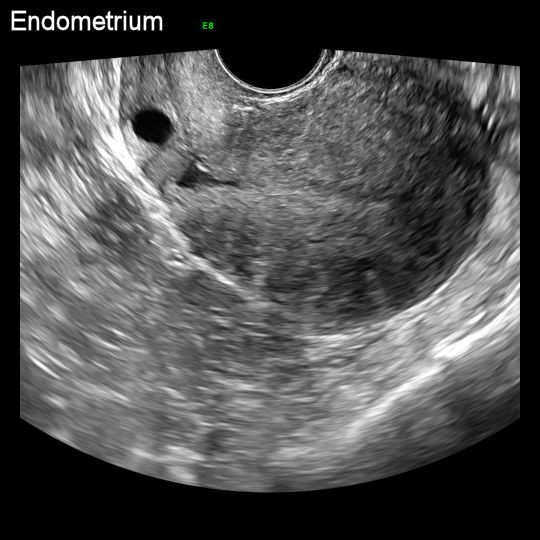

In [25]:
dst = cv.Laplacian(img1, cv.CV_16S, ksize=3)
abs_dst = cv.convertScaleAbs(dst)
cv2_imshow(dst)
cv2_imshow(abs_dst)
cv2_imshow(img1)